## Customer Segmentation Project 

### 2. Data Analysis and Visualization
In this section, the data analysis and visualisation are performed on the data

In [1]:
# Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data from local folder, saved after performing data cleaning steps

online_trans_cleaned = pd.read_pickle('../data/online_trans_cleaned.pkl')
online_trans_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395661 entries, 0 to 404908
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   invoice            395661 non-null  object        
 1   stock_code         395661 non-null  object        
 2   description        395661 non-null  object        
 3   price              395661 non-null  float64       
 4   quantity           395661 non-null  int64         
 5   total_order_value  395661 non-null  float64       
 6   invoice_date       395661 non-null  datetime64[ns]
 7   customer_id        395661 non-null  object        
 8   country            395661 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.2+ MB


In [3]:
# Check the summary of the table

online_trans_cleaned.describe()

,price,quantity,total_order_value,invoice_date
count,395661.000000,395661.000000,395661.000000,395661
mean,2.876731,12.353118,20.888248,2011-07-10 14:57:35.906950144
min,0.000000,-9360.000000,-6539.400000,2010-12-01 08:26:00
25%,1.250000,2.000000,4.250000,2011-04-07 09:12:00
50%,1.950000,5.000000,11.700000,2011-07-31 11:45:00
75%,3.750000,12.000000,19.500000,2011-10-20 12:31:00
max,649.500000,12540.000000,38970.000000,2011-12-09 12:50:00
std,4.162989,50.098497,95.683986,NaN


In [4]:
# List summary of data

print("# of unique stock codes:", len(online_trans_cleaned.stock_code.unique()))
print("# of unique invoices:", len(online_trans_cleaned.invoice.unique()))
print("# of unique customers:", len(online_trans_cleaned.customer_id.unique()))
print("# of ship to countries:", len(online_trans_cleaned.country.unique()))

# of unique stock codes: 3664
# of unique invoices: 21164
# of unique customers: 4352
# of ship to countries: 37


### Company Based

In [5]:
# What is the total revenue for the company for the period of the data?

total_revenue = online_trans_cleaned.total_order_value.sum().round(2)
total_revenue

8264664.98

In [6]:
# What is the average no of invoice generated by the customer?

avg_invoice_customer = online_trans_cleaned.groupby("customer_id").invoice.nunique().mean().round(2)
avg_invoice_customer

4.86

In [7]:
# What is the average total spent by the customer?

avg_spent_customer = online_trans_cleaned.groupby("customer_id").total_order_value.sum().mean().round(2)
avg_spent_customer

1899.05

In [8]:
# Create year, month and day of week variables

online_trans_cleaned["invoice_year"] = online_trans_cleaned.invoice_date.dt.year
online_trans_cleaned["invoice_month"] = online_trans_cleaned.invoice_date.dt.month
online_trans_cleaned["invoice_day"] = online_trans_cleaned.invoice_date.dt.day
online_trans_cleaned["week_day"] = online_trans_cleaned.invoice_date.dt.day_of_week
online_trans_cleaned["period"] = online_trans_cleaned.invoice_date.dt.to_period('M')

# Map the corresponding week day
day_of_week_mapping = dict({0: "Monday", 
                            1: "Tuesday", 
                            2: "Wednesday" , 
                            3: "Thursday", 
                            4: "Friday", 
                            5: "Saturday", 
                            6: "Sunday"})

online_trans_cleaned["week_day"] = online_trans_cleaned["week_day"].map(day_of_week_mapping)

online_trans_cleaned.head()

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country,invoice_year,invoice_month,invoice_day,week_day,period
0,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,1.25,24,30.00,2010-12-01 08:45:00,u12583,France,2010,12,1,Wednesday,2010-12
1,536373,82494L,WOODEN FRAME ANTIQUE WHITE,2.55,6,15.30,2010-12-01 09:02:00,u1785,United Kingdom,2010,12,1,Wednesday,2010-12
2,536378,21929,JUMBO BAG PINK VINTAGE PAISLEY,1.95,10,19.50,2010-12-01 09:37:00,u14688,United Kingdom,2010,12,1,Wednesday,2010-12
3,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,2.95,1,2.95,2010-12-01 09:41:00,u15311,United Kingdom,2010,12,1,Wednesday,2010-12
4,536381,15056BL,EDWARDIAN PARASOL BLACK,5.95,2,11.90,2010-12-01 09:41:00,u15311,United Kingdom,2010,12,1,Wednesday,2010-12


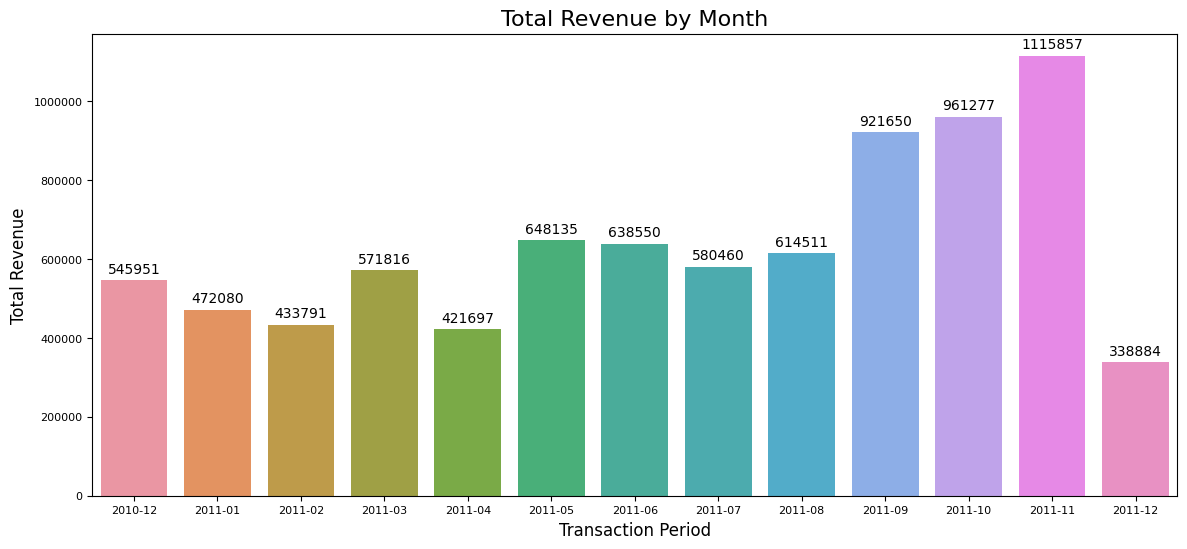

In [9]:
# What is the total revenue of the company by month?

total_revenue_month = online_trans_cleaned.groupby(["period"])["total_order_value"].sum()

plt.figure(figsize = [14, 6])
base_color = sns.color_palette()[0]

ax = sns.barplot(x = total_revenue_month.index, y = total_revenue_month.values)
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
ax.bar_label(ax.containers[0], padding = 3, fmt = '%d') # annotates bar plots with labels without scientific notation 

plt.title('Total Revenue by Month', size = 16)
plt.xlabel('Transaction Period', size = 12)
plt.ylabel('Total Revenue', size = 12)
yticks = [0, 200000, 400000, 600000, 800000, 1000000]
ax.set_yticklabels(yticks)
plt.show();

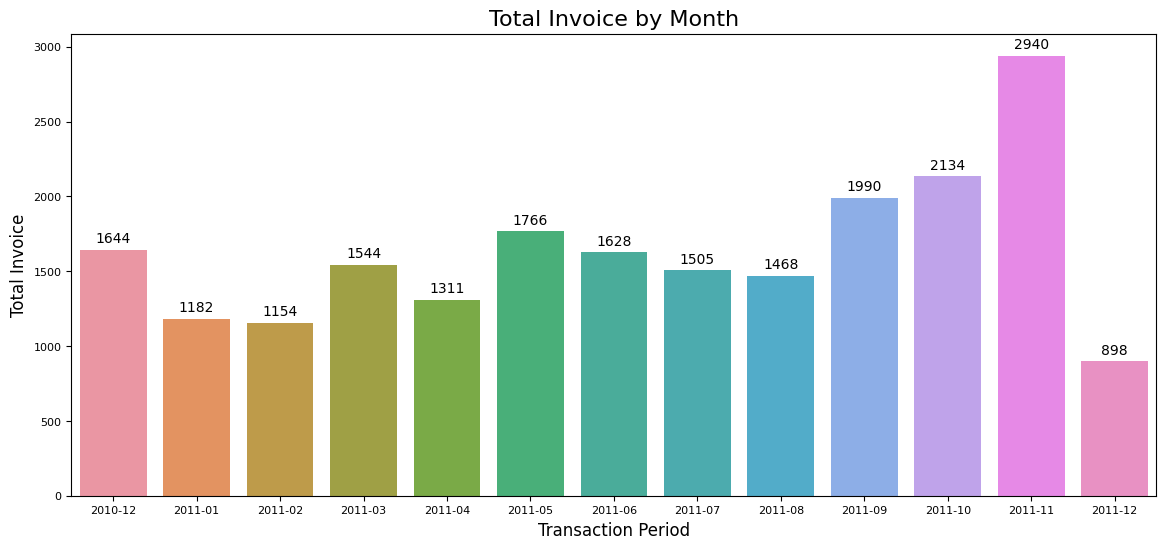

In [10]:
# What is the number of invoice generated by month?

total_invoice_month = online_trans_cleaned.groupby(["period"])["invoice"].nunique()

plt.figure(figsize = [14, 6])
base_color = sns.color_palette()[0]

ax = sns.barplot(x = total_invoice_month.index, y = total_invoice_month.values)
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Total Invoice by Month', size = 16)
plt.xlabel('Transaction Period', size = 12)
plt.ylabel('Total Invoice', size = 12)
plt.show();

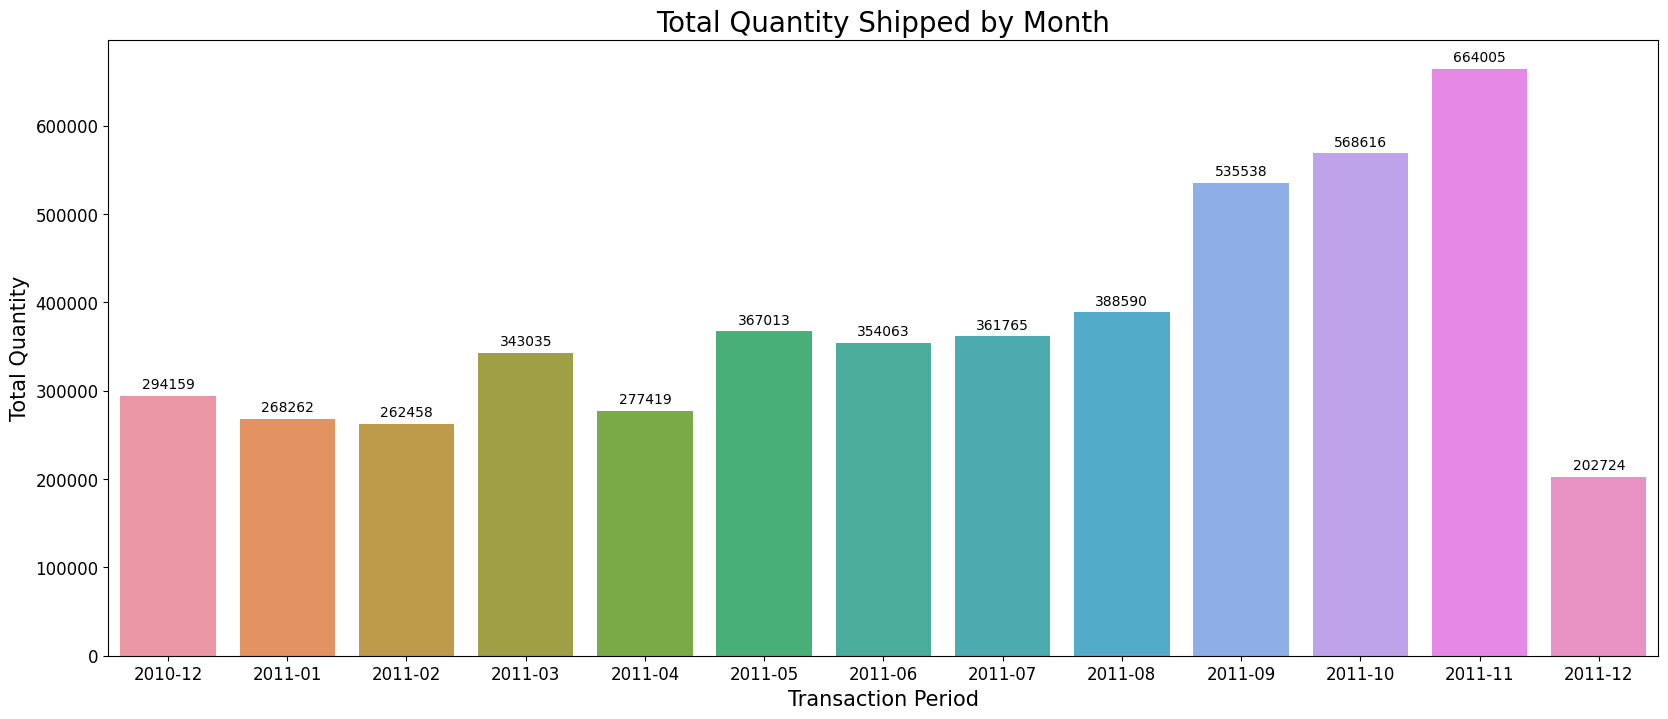

In [11]:
# What is the total quantity shipped by month?

total_qty_month = online_trans_cleaned.groupby(["period"])["quantity"].sum()

plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]

ax = sns.barplot(x = total_qty_month.index, y = total_qty_month.values)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Total Quantity Shipped by Month', size = 20)
plt.xlabel('Transaction Period', size = 15)
plt.ylabel('Total Quantity', size = 15)
plt.show();

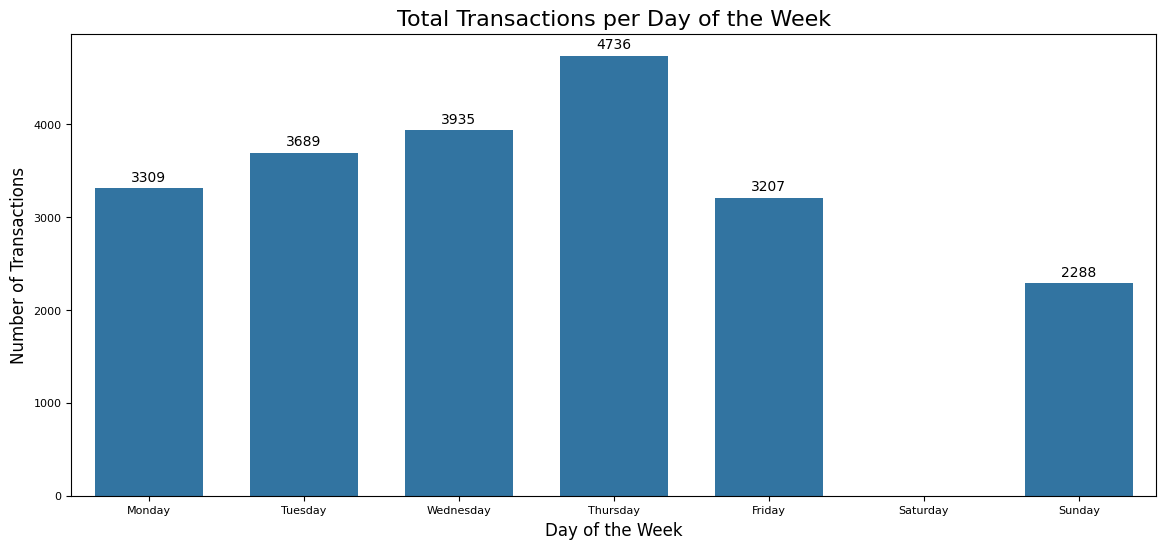

In [12]:
# What is the number of transactions by day of the week?

weekday_transactions = online_trans_cleaned.groupby(['week_day'])['invoice'].nunique()

plt.figure(figsize = [14, 6])
base_color = sns.color_palette()[0]

# Order to plot the categorical variables in
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sns.barplot(x = weekday_transactions.index, y = weekday_transactions.values, color = base_color, order = order, width = 0.7)
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Total Transactions per Day of the Week', size = 16)
plt.xlabel('Day of the Week', size = 12)
plt.ylabel('Number of Transactions', size = 12)
plt.show();

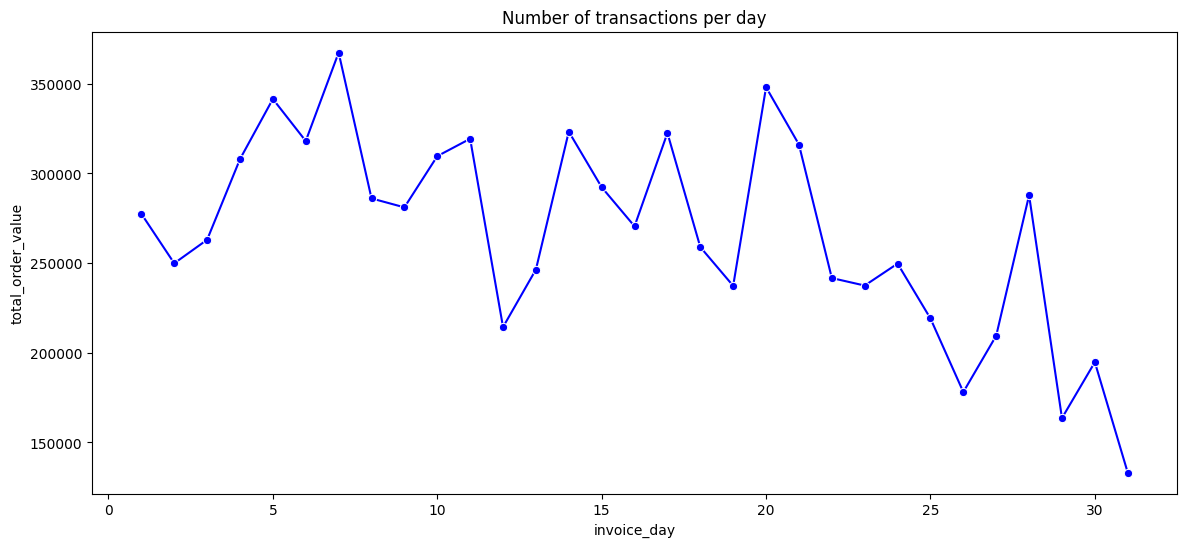

In [13]:
# What is the total order value by the day of month?

total_revenue_day = pd.DataFrame(online_trans_cleaned.groupby(["invoice_day"])["total_order_value"].sum())

plt.figure(figsize=(14 , 6))
sns.lineplot(x = "invoice_day", y = "total_order_value", data = total_revenue_day , marker = "o", color = "blue")
plt.title("Number of transactions per day");

### Country Based

In [14]:
# Summary of total customers by country

cust_by_country = online_trans_cleaned.groupby(['country']).customer_id.nunique().sort_values(ascending = False)
cust_by_country

country
United Kingdom          3935
Germany                   95
France                    87
Spain                     29
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     14
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Channel Islands            9
Denmark                    9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
Canada                     4
Unspecified                4
Israel                     4
Greece                     4
EIRE                       3
Malta                      2
USA                        2
United Arab Emirates       2
Bahrain                    2
Lithuania                  1
Czech Republic             1
Lebanon                    1
RSA                        1
Saudi Arabia               1
Singapore                  1
Icelan

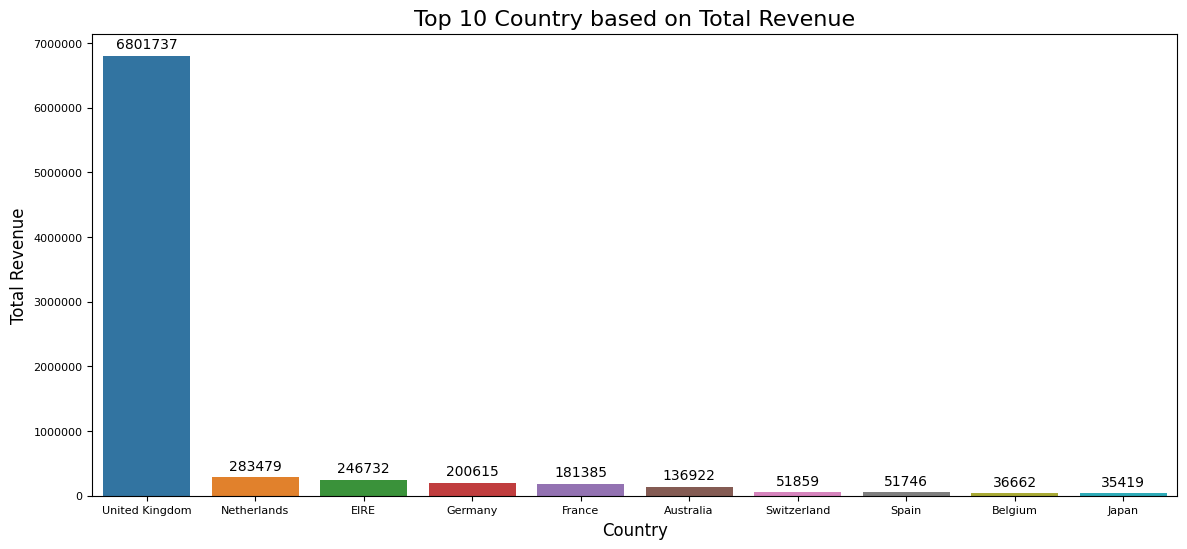

In [15]:
# What are the top ten countries based on total revenue?

top10_country_rev = online_trans_cleaned.groupby(['country'])['total_order_value'].sum().sort_values(ascending=False)[:10]

plt.figure(figsize = [14, 6])

ax = sns.barplot(x = top10_country_rev.index, y = top10_country_rev.values)
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
ax.bar_label(ax.containers[0], padding = 3, fmt = '%d')

plt.title('Top 10 Country based on Total Revenue', size = 16)
plt.xlabel('Country', size = 12)
plt.ylabel('Total Revenue', size = 12)
yticks = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000]
ax.set_yticklabels(yticks)

plt.show;

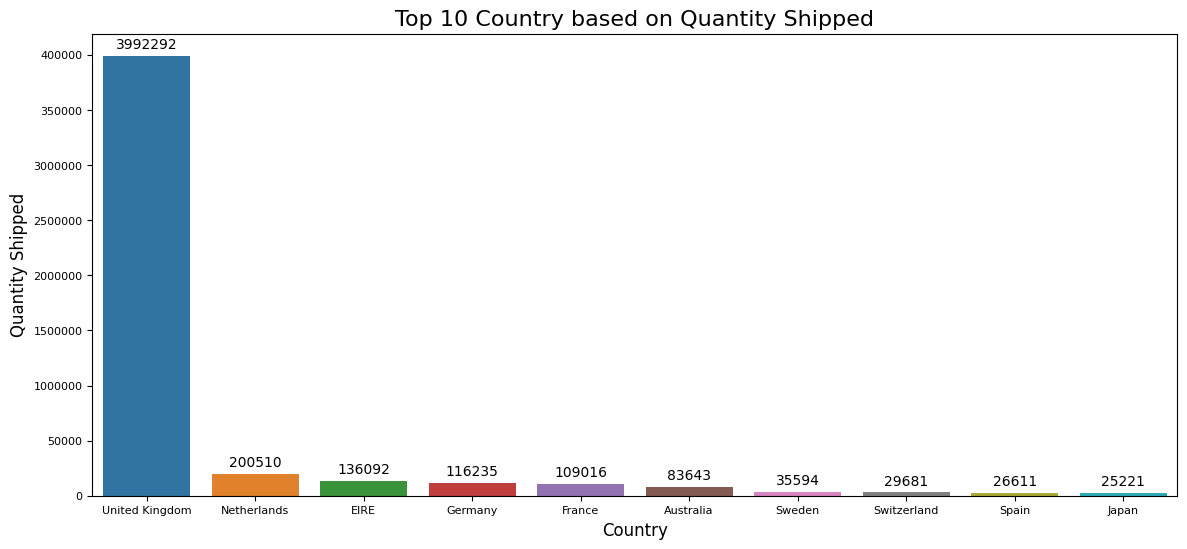

In [16]:
# What are the top ten countries based on quantity shipped?

top10_country_qty = online_trans_cleaned.groupby(['country'])['quantity'].sum().sort_values(ascending=False)[:10]

plt.figure(figsize = [14, 6])

ax = sns.barplot(x = top10_country_qty.index, y = top10_country_qty.values)
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
ax.bar_label(ax.containers[0], padding = 3, fmt = '%d')

plt.title('Top 10 Country based on Quantity Shipped', size = 16)
plt.xlabel('Country', size = 12)
plt.ylabel('Quantity Shipped', size = 12)
yticks = [0, 50000, 1000000, 1500000, 2000000, 2500000, 3000000, 350000, 400000]
ax.set_yticklabels(yticks)
plt.show;

### Customer based

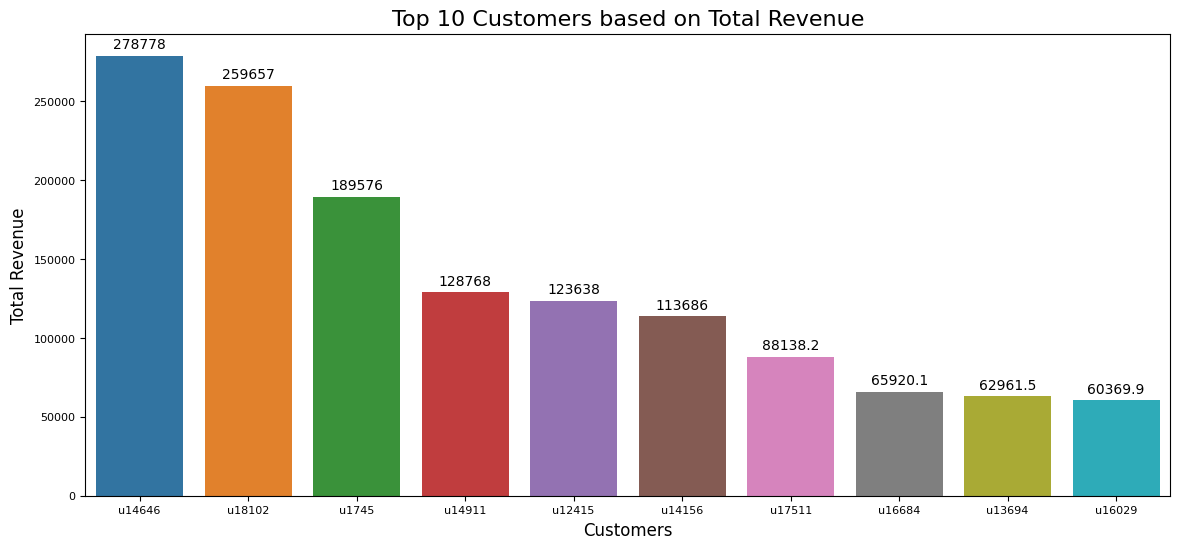

In [17]:
# What are the top ten customers based on revenue?

top10_cust_rev = online_trans_cleaned.groupby(['customer_id'])['total_order_value'].sum().sort_values(ascending=False)[:10]

plt.figure(figsize = [14, 6])

ax = sns.barplot(x = top10_cust_rev.index, y = top10_cust_rev.values)
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Top 10 Customers based on Total Revenue', size = 16)
plt.xlabel('Customers', size = 12)
plt.ylabel('Total Revenue', size = 12)
plt.show;

In [18]:
# Which countries are the top 10 customers from?

countries_top_10_cust_rev = online_trans_cleaned.groupby(['customer_id', 'country'])['total_order_value'].sum().sort_values(ascending=False)[:10]
countries_top_10_cust_rev

customer_id  country       
u14646       Netherlands       278778.02
u18102       United Kingdom    259657.30
u1745        United Kingdom    189575.53
u14911       EIRE              128768.24
u12415       Australia         123638.18
u14156       EIRE              113685.77
u17511       United Kingdom     88138.20
u16684       United Kingdom     65920.12
u13694       United Kingdom     62961.54
u16029       United Kingdom     60369.93
Name: total_order_value, dtype: float64

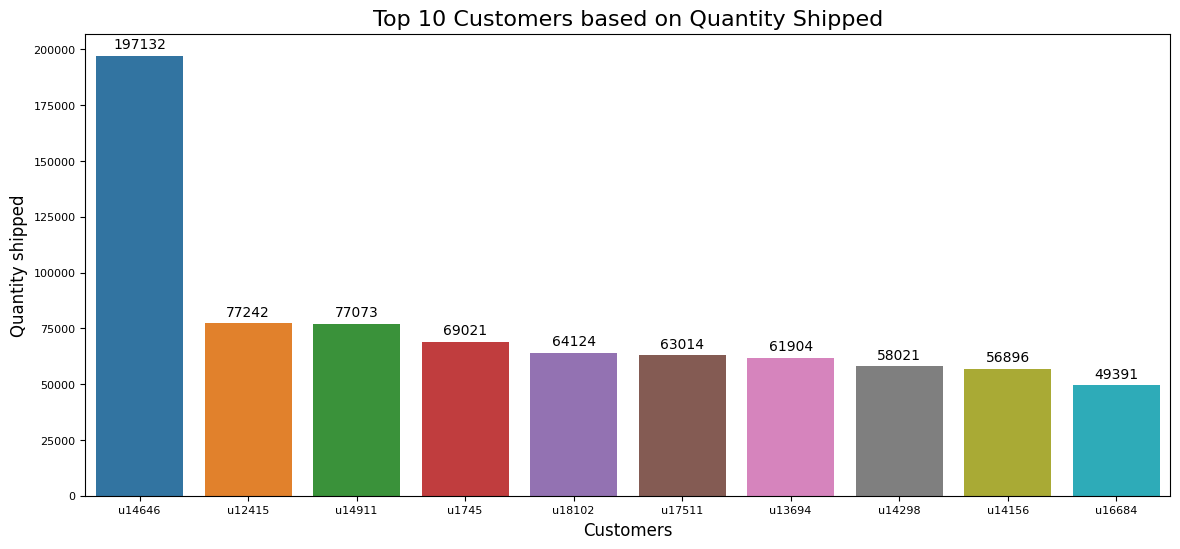

In [19]:
# What are the top ten customers based on quantity shipped?

top10_cust_qty = online_trans_cleaned.groupby(['customer_id'])['quantity'].sum().sort_values(ascending=False)[:10]

plt.figure(figsize = [14, 6])

ax = sns.barplot(x = top10_cust_qty.index, y = top10_cust_qty.values)
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Top 10 Customers based on Quantity Shipped', size = 16)
plt.xlabel('Customers', size = 12)
plt.ylabel('Quantity shipped', size = 12)
plt.show;

In [20]:
# Which countries are the top 10 customers by quantity from?

countries_top_10_qty = online_trans_cleaned.groupby(['customer_id', 'country'])['quantity'].sum().sort_values(ascending=False)[:10]
countries_top_10_qty

customer_id  country       
u14646       Netherlands       197132
u12415       Australia          77242
u14911       EIRE               77073
u1745        United Kingdom     69021
u18102       United Kingdom     64124
u17511       United Kingdom     63014
u13694       United Kingdom     61904
u14298       United Kingdom     58021
u14156       EIRE               56896
u16684       United Kingdom     49391
Name: quantity, dtype: int64

### Product Based 

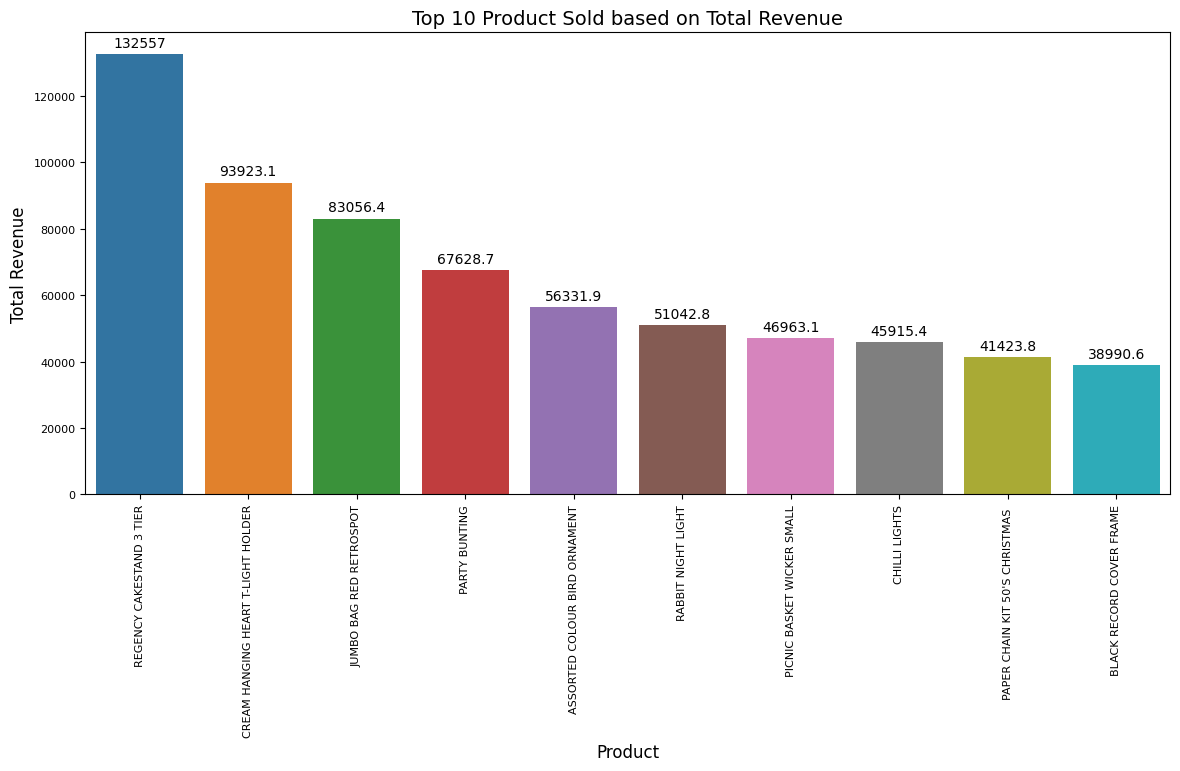

In [21]:
# What is the top 10 products sold based on total_revenue?

top10_product_rev = online_trans_cleaned.groupby(['description'])['total_order_value'].sum().sort_values(ascending=False)[:10]

plt.figure(figsize = [14, 6])

ax = sns.barplot(x = top10_product_rev.index, y = top10_product_rev.values)
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Top 10 Product Sold based on Total Revenue', size = 14)
plt.xlabel('Product', size = 12)
plt.xticks(rotation = 90)
plt.ylabel('Total Revenue', size = 12)
plt.show;

In [22]:
# What is the price of the Top10 products shipped based on revenue?

top10_product_rev_price = pd.DataFrame(online_trans_cleaned.groupby(['description', 'price'])['total_order_value'].sum().sort_values(ascending=False)[:10])
top10_product_rev_price

total_order_value
description                        price                    
REGENCY CAKESTAND 3 TIER           10.95            85629.00
                                   12.75            46333.50
CREAM HANGING HEART T-LIGHT HOLDER 2.55             44742.30
PICNIC BASKET WICKER SMALL         649.50           39619.50
ASSORTED COLOUR BIRD ORNAMENT      1.69             37110.71
RABBIT NIGHT LIGHT                 1.79             35586.99
BLACK RECORD COVER FRAME           3.39             35150.91
PARTY BUNTING                      4.95             33432.30
JUMBO BAG RED RETROSPOT            1.79             33161.54
CREAM HANGING HEART T-LIGHT HOLDER 2.95             31213.95

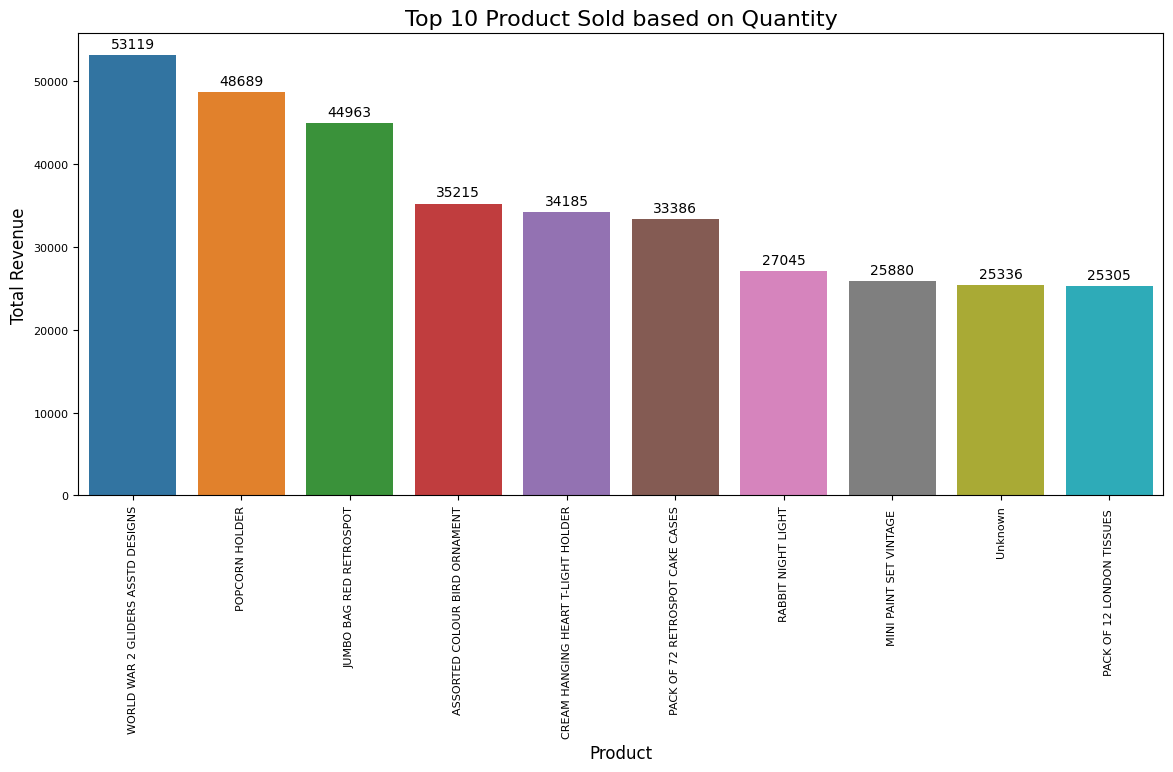

In [23]:
# What is the top 10 product sold based on quantity shipped?

top10_product_qty = online_trans_cleaned.groupby(['description'])['quantity'].sum().sort_values(ascending=False)[:10]

plt.figure(figsize = [14, 6])

ax = sns.barplot(x = top10_product_qty.index, y = top10_product_qty.values)
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Top 10 Product Sold based on Quantity', size = 16)
plt.xlabel('Product', size = 12)
plt.xticks(rotation = 90)
plt.ylabel('Total Revenue', size = 12)
plt.show;

In [24]:
# What is the price of the Top10 products shipped based on quantity

top10_product_qty_price = pd.DataFrame(online_trans_cleaned.groupby(['description', 'price'])['quantity'].sum().sort_values(ascending=False)[:10])
top10_product_qty_price

quantity
description                        price          
POPCORN HOLDER                     0.72      35876
WORLD WAR 2 GLIDERS ASSTD DESIGNS  0.29      27192
                                   0.21      22944
ASSORTED COLOUR BIRD ORNAMENT      1.69      21959
RABBIT NIGHT LIGHT                 1.79      19881
JUMBO BAG RED RETROSPOT            1.79      18526
CREAM HANGING HEART T-LIGHT HOLDER 2.55      17546
PACK OF 72 RETROSPOT CAKE CASES    0.55      17229
MINI PAINT SET VINTAGE             0.65      16692
ASSORTED COLOUR BIRD ORNAMENT      1.45      13256

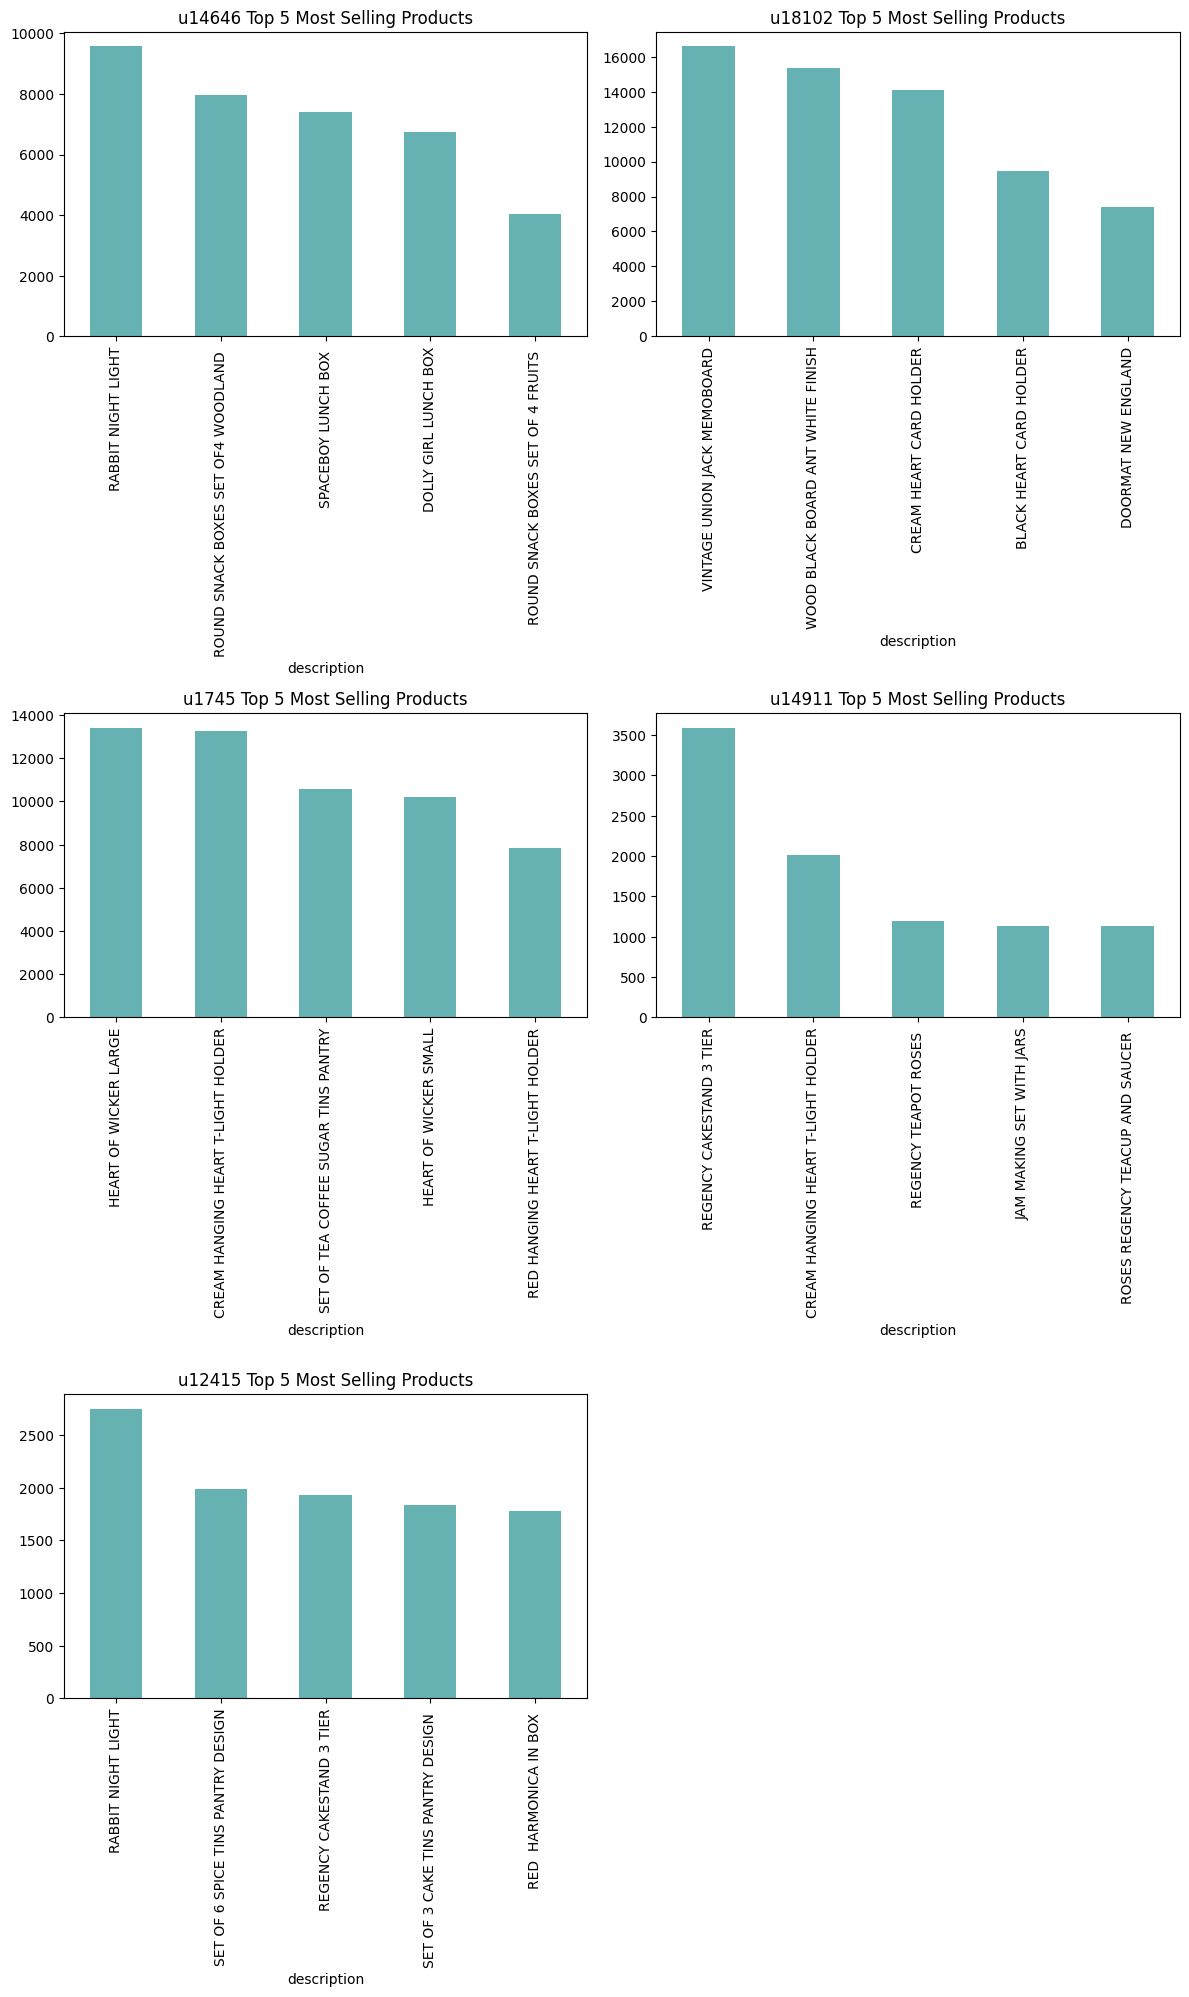

In [25]:
# What is the Top 5 Products shipped to the Top 5 Customers

top5_customer_id = ["u14646", "u18102", "u1745", "u14911", "u12415"] # list of top 5 customer_id
temp = pd.DataFrame(online_trans_cleaned.groupby(['customer_id', 'description'])['total_order_value'].sum()) 

x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(top5_customer_id):
    ax = plt.subplot(4, 2, x + 1)
    plt.title(c + ' '+ "Top 5 Most Selling Products")
    temp.loc[c].sort_values(by = "total_order_value", ascending = False)["total_order_value"].head(5).plot(kind = "bar", ax = ax, color = "teal", alpha = 0.6)
    plt.tight_layout()

In [26]:
online_trans_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395661 entries, 0 to 404908
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   invoice            395661 non-null  object        
 1   stock_code         395661 non-null  object        
 2   description        395661 non-null  object        
 3   price              395661 non-null  float64       
 4   quantity           395661 non-null  int64         
 5   total_order_value  395661 non-null  float64       
 6   invoice_date       395661 non-null  datetime64[ns]
 7   customer_id        395661 non-null  object        
 8   country            395661 non-null  object        
 9   invoice_year       395661 non-null  int32         
 10  invoice_month      395661 non-null  int32         
 11  invoice_day        395661 non-null  int32         
 12  week_day           395661 non-null  object        
 13  period             395661 non-null  period[M]    

In [27]:
online_trans_cleaned.head()

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country,invoice_year,invoice_month,invoice_day,week_day,period
0,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,1.25,24,30.00,2010-12-01 08:45:00,u12583,France,2010,12,1,Wednesday,2010-12
1,536373,82494L,WOODEN FRAME ANTIQUE WHITE,2.55,6,15.30,2010-12-01 09:02:00,u1785,United Kingdom,2010,12,1,Wednesday,2010-12
2,536378,21929,JUMBO BAG PINK VINTAGE PAISLEY,1.95,10,19.50,2010-12-01 09:37:00,u14688,United Kingdom,2010,12,1,Wednesday,2010-12
3,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,2.95,1,2.95,2010-12-01 09:41:00,u15311,United Kingdom,2010,12,1,Wednesday,2010-12
4,536381,15056BL,EDWARDIAN PARASOL BLACK,5.95,2,11.90,2010-12-01 09:41:00,u15311,United Kingdom,2010,12,1,Wednesday,2010-12


In [28]:
# Load the preprocessed dataframe to a .pkl file in local folder

online_trans_cleaned.to_pickle('../data/online_trans_cleaned_rfm.pkl')

In [29]:
# Load preprocessed dataframe to a .csv file for Tableau visualisation

online_trans_cleaned.to_csv('../data/online_trans_cleaned_tableau.csv', index = False)

### Summary

1. There are a total of 21164 invoices generated and 3664 different products from a total of 395661 rows of transactions
2. Total revenue for the period from 01.12.2010 to 09.12.2011 is 8264664 with United Kingdom contributing 82.3% with a total of 6801737
3. There is a total of 4352 customers from 37 countries, with United Kingdom having the most customers with a total of 3935 customers(90.4%)
4. Highest revenue generated and highest total quantity shipped is United Kingdom as 90% of the customers are from United Kingdom 
5. Highest revenue generated is from customer u14646 from Netherlands with total revenue of 278778.02(3.4%)
6. Average price of the products shipped is 2.877
7. There are a difference of 2 products that are in the Top 10 shipped product based on total revenue vs quantity because of the higher price of the product which generated more revenue
8. Total revenue increases towards the end of the year which could be due to festive seasons
9. There are more transactions generated during the beginning to the middle of the month compared to the end of the month